<a href="https://colab.research.google.com/github/wojr21/courses/blob/main/data_science_bootcamp/09_drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

sns.set()
np.random.seed(10)

In [ ]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print(f'Liczba próbek: {len(data)}')
print(f'Kształt danych: {data.shape}')
print(f'Nazwy zmiennych objaśniających: {feature_names}')
print(f'Nazwy kategorii kosaćca: {class_names}')

Liczba próbek: 150
Kształt danych: (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


In [ ]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns = feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df.describe().T.apply(lambda x: round(x, 2))

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
class,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


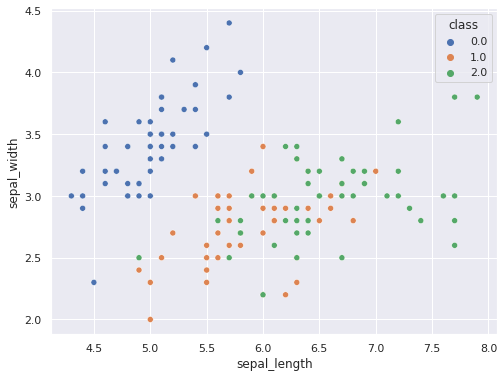

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'sepal_length',y = 'sepal_width', hue = 'class', data = df,
                legend = 'full', palette = sns.color_palette()[:3])
plt.show()

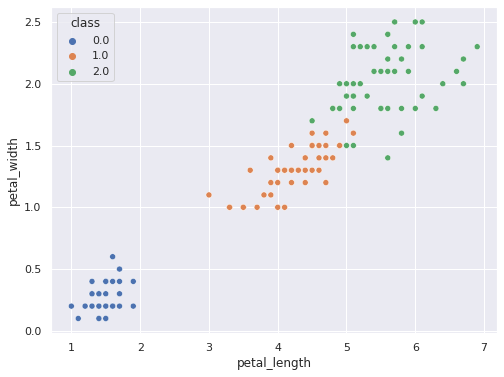

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'petal_length',y = 'petal_width', hue = 'class', data = df,
                legend = 'full', palette = sns.color_palette()[:3])
plt.show()

In [ ]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

### Przygotowanie danych do modelu

In [ ]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [ ]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

In [ ]:
X = X.values
y = y.values.astype('int16')

### Budowa klasyfikatora drzewa decyzyjnego

max_depth = 1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 1, random_state = 30)
classifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=30, splitter='best')

Wykreślenie granic decyzyjnych

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


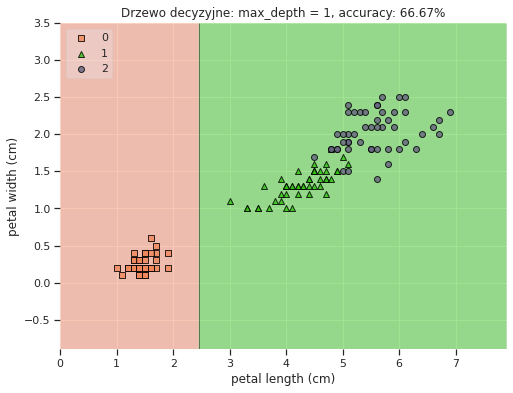

In [ ]:
from mlxtend.plotting import plot_decision_regions

colors = '#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,\
          #e3777c2,#7f7f7f,#bcbd22,#17becf'

acc = classifier.score(X, y)

plt.figure(figsize = (8, 6))
plot_decision_regions(X, y, classifier, legend = 2, colors = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'Drzewo decyzyjne: max_depth = 1, accuracy: {acc*100:.2f}%')
plt.show()

### Graf drzewa decyzyjnego

max_depth = 1

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(classifier,
                out_file = 'iris_tree.dot',)